
<div style="background-color: black; padding-top: 30px;
  padding-right: 30px;
  padding-bottom: 20px;
  padding-left: 30px; width: 100%; display: flex">


<div style="background-color: black; padding-top: 30px;
  padding-right: 1px;
  padding-bottom: 1px;
  padding-left: 1px; width: 100%">


<p><font color=#f1f1f1 style="font-family:Impact Regular" size=70>    Next Song Syndrome:</font></p>


<p><font color=#f1f1f1 style="font-family:Impact Regular" size=5> Creating a Next Song Recommender System </font></p></span>


</div>
</div>


<div style="background-color: #488f31; padding-top: 20px;
  padding-right: 15px;
  padding-bottom: 20px;
  padding-left: 15px">
</div>


Packages Included

In [45]:
from IPython.display import HTML
HTML('''<script>code_show=true;function code_toggle() {if (code_show)
{$('div.input').hide();} else {$('div.input').show();}
code_show = !code_show}$( document ).ready(code_toggle);
</script><form action="javascript:code_toggle()">
<input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.spatial.distance import cosine
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)
%matplotlib inline

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">EXECUTIVE SUMMARY</span></div>

<p style="text-align: justify">awdawdawdawdad</p> 

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">INTRODUCTION</span></div>

<p style="text-align: justify">adawdawdadwawdad.</p>

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">PROBLEM STATEMENT</span></div>

  ###        adawdawdawd

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">BUSINESS VALUE</span></div>


- **awdawdawd**: awdawdawdaw

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">METHODOLOGY</span></div>

<p style="text-align: justify">To properly address the problem, the researchers will be needing viable dataset. The Researcher will follow the general work flow defined below to arrive at a conclusion and recommendation.</p>

*Figure 1: A general work flow of the study*
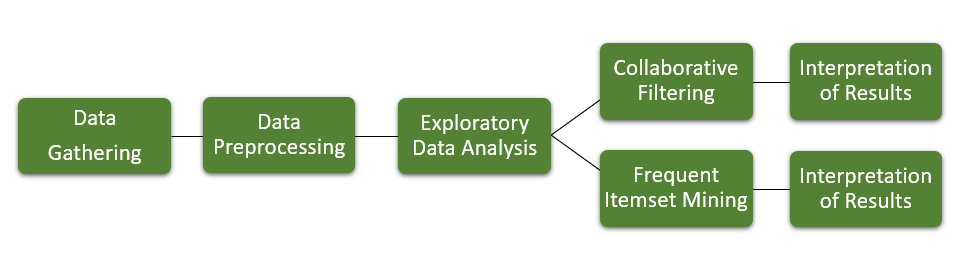

### OVERVIEW OF THE METHODOLOGY
Each step will be discussed in detail in the following sections. To give a general overview of the methodology, a brief description for each step is described below:

#### 1. Data Gathering

The Set of Images was scraped over the internet with different URLs of Porn Images and Safe Images.

The Scraping Process are as follows:

1. Collect List of URLS of Porn Images and Safe Images, sample URL list can be seen on different github pages and public dataset.
2. For Loop over the URLS 
3. Save the File on a Specific filepath

**Note!:** 

There is a possibility that the images will not be able to be scraped properly due to slow internet connection. It is recommended that before processing the images, the images should be checked manually individually which was done by the researchers. Also, it is recommended that the images should be checked intensively since there pictures and images that are tagged as porn but not necessarily porn. Including this images will just make the model confuse.


#### 2. Data Preprocessing:

The gathered data was cleaned and formatted prior analysis. 

There two possible ways in preprocessing to be able to create a machine learning model for this problems:
    
**1st Technique, Use Flattened Images in a CSV File**

    The steps are as follows:

        1. Opening the Images using the Skimage Function
        2. Natural Sorting the Image Names for Easier Checking
        3. For Loop over the Images
        4. Set a Dummy Numpy Float Variable with a Float32 Data type
        5. Resize the Image to a specified shape size for uniformity
        6. Flatten the Image
        7. Copy to the Dummy Numpy Variable
        8. Save to a CSV File
        9. Save into S3 Bucket for Easier Analysis over Different Users

    In accordance to the need project, the CSV Files amounts to almost 55GB.
    
    
The CSV Files can be accessed through this S3 Link: 

           s3://bdccproject/nsfw_dataset/

**2nd Technique, Used the Image Directly using Dask Image**

        1. Scraped the Web Using AWS
        2. Save to Local File in an AWS Instance
        3. Save to an S3 Bucket

    In accordance to the need project, the CSV Files amounts to almost 60GB.
    
The Images can be accessed through this S3 Link: 

            s3://bdccproject/images/

There are certain advantages for each technique which will be further discussed below.
  
#### 3. Machine Learning Phase

The processed data will be parsed using the Dask Library, a python library that can be used for Big Data.

The following technique was done to read the files:

* Using Dask Dataframe in Reading the CSV Files

* Using Dask Image/Dask Array in Reading the Image Files

After Reading the Needed Files, the items was split in to Training and Test Set and was passed through different Machine Learning Models below:

* Logistic Regression for Baseline Model
* Random Forest Classifier (Basic)
* Random Forest Classifier (Higher Depth-Fine Tuning)

We used different Configuration of AWS EC2 Instances to be able to parse through the Models and the Data. This will be discussed below.

#### 4. Interpretation of Results

* Analyze the results of the collaborative filtering by comparing the results to each model created.


<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">DATA GATHERING</span></div>

<p style="text-align: justify">There are various sources of information for a Recommender System that models a next song algorithm. For this research, we will be using a dataset which contain 11.6 million music listening events that was scraped on Twitter. It has almost 139,000 Users and 346,000 Tracks/Songs. There are various itemset content features and user context features that comes with the data.

For this research, we will be focusing on the sentiment score that comes with the data. To describe the sentiment, each track_id that was chosen by the user will have a unique hashtag accompanying to it (example: "kiss92"). Each of this hashtag equates to a sentiment score from the data. This will serve as the rating of the track_id chosen by the user. In some way, the user has already tagged the track_id with a specific score by using different hashtags on its. In this way, we can actually recommend songs that is purely based on how the user really feels about each songs. 

To minimize the research, we will be only using the train file, represented by the filepath below:
* '/mnt/data/public/nowplaying-rs/Train-Test Splits/Context/train.csv' </p>


<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">DATA DESCRIPTION</span></div>

<p style="text-align: justify">The Dataset contains the following columns and its specific description that is stored in a csv file. For simplicity of the algorithm, we will be reading through a dataframe.</p>

**Nowplaying-RS-Train File**

| Column Name 	| Description 	|
|-:	|:-:	|
| User ID 	| Unique user ID 	|
| Track ID 	| Unique track ID 	|
| Hashtag 	| Hashtags contained in Listening Event; categorizes and contextualizes a tweet by a keyword 	|
| Sentiment Score 	| Sentiment score extracted from hashtags contained in Listening Event(ranges from 0 (negative) to 1 (positive)) 	|

In [2]:
filepath ='/mnt/data/public/nowplaying-rs/Train-Test Splits/Context/train.csv'
filepath = 'file.csv'
user_scores = pd.read_csv(
    filepath)[['user_id', 'track_id', 'hashtag', 'score']].drop_duplicates()
user_scores.head(5)

,user_id,track_id,hashtag,score
0,823214346,b129f3e0a0bdc1e61c57ce994f9d2932,kiss92,0.8
1,823214346,64b30f6ac1acecb7cef9dc890e1c3ea7,kiss92,0.8
2,823214346,cc1a46ee0446538ecf6b65db01c30cd8,kiss92,0.8
3,823214346,dbbd8525c1bc48cc791bfe618b74bac6,kiss92,0.8
4,823214346,dbdbb866939c1ab1dfd0d5cfac740eaa,kiss92,0.8


#### Dataframe Shape

In [3]:
user_scores.shape

(43940, 4)

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">DATA PREPROCESSING</span></div>

From the results of the dataframe above, we can see that for a specific user_id, there is a possibility of having many track_id which the user listened to. This is very important since we can use this chosen songs of the user to check which similar users also liked the same songs as the user. In this way, we can determined new songs/track_id to recommend to the chosen user. We can also see that the dataframe contains almost 44,000 sentiment rated track_id which proves to be very useful for the recommender system.

**Let us check for multiple hashtags for a unique track_id!**

In [4]:
# sample track_id
track_1 = ['212913']

In [5]:
user_scores[user_scores.user_id.isin(track_1)][:3]

,user_id,track_id,hashtag,score
251100,212913,af5383ec56b92bc6e2fef460747cb50d,chill,0.0
251102,212913,af5383ec56b92bc6e2fef460747cb50d,dark,0.2
251103,212913,af5383ec56b92bc6e2fef460747cb50d,classical,1.0


We can see from the results above that there are possibilities of having multiple hashtags for a unique track_id for a specific user. This happens since he/she might be feeling different hashtags for the same songs. To properly evaluate this event, we will be getting the average or the mean of the sentiment/hashtag scores for each unique track_id that has many hashtags and sentiment scores. The program and codes below will average all the needed scores and create a new dataframe with the respective values.

Please see results below:

In [6]:
user_score_mean = user_scores.groupby(['user_id', 'track_id']).mean()
user_score_mean

score
user_id    track_id                                  
212913     5650d316220c726016a1bc9387c3b18a  0.000000
           af5383ec56b92bc6e2fef460747cb50d  0.400000
           b3f19f29399b6e71bb5cbafdf890d01a  0.000000
           c49d2670c7327779a2abc0f148468ac7  1.000000
586803     06e99b67c0df1371643b5cb11eae1a13  0.837500
...                                               ...
2827169953 80fe21909bc6bf9a014d4fe94bdef42d  0.746875
           896d021024375f823a38698be26f510f  0.746875
           92b1ea43b32de3bed6661acfa7c8e816  0.746875
           f20e84df022a3d2a0efae5bc77786c87  0.746875
2830404192 e24b9ccd4b9cbfd115964f65ed945542  0.700000

[36650 rows x 1 columns]

#### Creating the Final DataFrame

In [7]:
user_final = pd.DataFrame(columns=['User', 'Track_ID', 'Score'])
count = 0
for x, y in user_score_mean.iterrows():
    user_final.loc[count] = [x[0], x[1], y['score']]
    count += 1
# final dataframe to be used on the recommender models
user_final.head(20)

,User,Track_ID,Score
0,212913,5650d316220c726016a1bc9387c3b18a,0.00000
1,212913,af5383ec56b92bc6e2fef460747cb50d,0.40000
2,212913,b3f19f29399b6e71bb5cbafdf890d01a,0.00000
3,212913,c49d2670c7327779a2abc0f148468ac7,1.00000
4,586803,06e99b67c0df1371643b5cb11eae1a13,0.83750
5,639743,014e9f12626f78649aaa7226ab62fd1f,0.87500
6,639743,044fc8e3773032edf71fb1fcb75b8aad,0.87500
7,639743,0bda79b2dda59822c1f9599a76802644,0.87500
8,639743,0d6a91a19299200b224942263489bdcc,0.87500
9,639743,1c9907719cd71f815eb4f667da1ee67b,0.87500


Now that we have processed the data, we can proceed with the following parts which are the exploratory data analysis and the recommender system model itself.

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">Preliminary-EDA</span></div>



Before going through the recommender system modeling, we should show a little bit of data analysis on the data at hand. We will show some statistical measures to have a good glimpse of what to expect on the succeeding parts.

#### Top 10 Hashtags per Count 

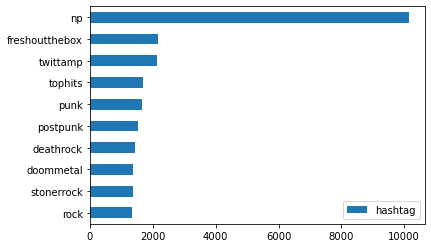

In [8]:
(pd.DataFrame(user_scores['hashtag'].value_counts())
 ).iloc[0:10].plot.barh().invert_yaxis()

We can see from the results that the highest number of hashtags are seen to be the hashtag 'np' which means nowplaying.

#### Top 10 Sentiment Score per Usage

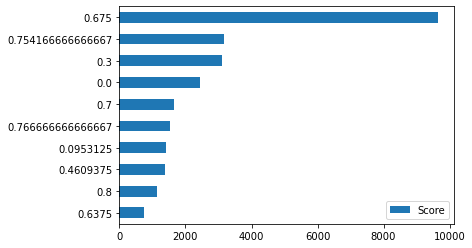

In [9]:
(pd.DataFrame(user_final['Score'].value_counts())
 ).iloc[0:10].plot.barh().invert_yaxis()

Based on the results, we can see the top 10 sentiment scores that is usually seen on the dataset. We can also see that a lot of users actually has a sentiment score of 0.675 which is already leaning to a positive sentiment.

#### Density Plot of the Sentiment Scores

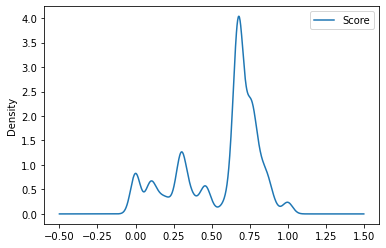

In [10]:
user_final['Score'].plot.density(legend=True)

We can see from the density plot that the distribution of the sentiment scores are biased on the positive side leaning on the 75%

In [11]:
df_utility = user_final.pivot_table(
    index='User', columns='Track_ID', values='Score', fill_value=None)

#### Top 10 User by Mean Sentiment Score

In [12]:
df_utility.mean(axis=1).sort_values(ascending=False)[:10]

User
261980126     1.0
2237386121    1.0
107705302     1.0
162483406     1.0
382358266     1.0
241485471     1.0
286671853     1.0
32407042      1.0
385460038     1.0
260566741     1.0
dtype: float64

This users are considered to be listening to songs that they feel will be very positive to them.

#### Users having the Lowest Mean Sentiment Score

In [13]:
df_utility.mean(axis=1).sort_values(ascending=True)[:10]

User
544870774    0.0
976997209    0.0
25836211     0.0
120023998    0.0
330113130    0.0
330009969    0.0
328917410    0.0
25665281     0.0
328697429    0.0
223726997    0.0
dtype: float64

This users are considered to be listening to songs that they feel to be very negative to them.

#### Density Plot per User's Mean Sentiment Scores

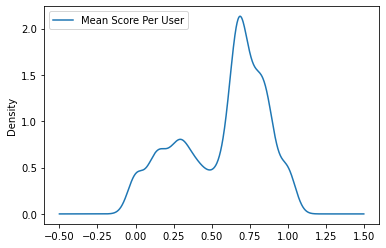

In [14]:
df_utility.mean(axis=1).plot.density(legend=True, label='Mean Score Per User')

Based on the results, we can see that it is almost the same as the previous density graph but with a little increase in distribution in the negative sentiment.

#### Top 10 Track IDs with Highest Mean Sentiment Score

In [15]:
df_utility.mean(axis=0).sort_values(ascending=False)[:10]

Track_ID
bdd6b15608d1c638c96d48eeb32f3691    1.0
01a8176a8cd6d2c3b764325c0468388d    1.0
f5aced8e5417905217b5068636823a41    1.0
66af6f5c0d1e9235bef50d10a0b3cfb7    1.0
7da3030e9387c31b0c2662c65c72e45f    1.0
51b345029b596b8858768e9ebe53d9f6    1.0
6b25057ca5bc1ab10457c18efae4f41e    1.0
8cdf9aea8a53e1766d00b888ce59e7d7    1.0
1668a68ec2be20c1796e45013d30e0ea    1.0
b31dce8b8b33ae7c95ec100973778d13    1.0
dtype: float64

This Track_IDs/Songs seems to be tracks that emit positive sentiment since their sentiment scores/value is definitely on the positive side.

#### Track IDs with the Lowest Mean Sentiment Score

In [16]:
df_utility.mean(axis=0).sort_values(ascending=True)[:10]

Track_ID
7f4baba1dcc4084db8c9eccd0444d550    0.0
1f6664a032f9b0591cd1bc3d2b62f794    0.0
b868de2a80d6e3a0aefb3fddbb275d28    0.0
1f107fbc0ded35a4dd2a6a49b40252ee    0.0
1eb172600a01170d0e93ef458959c04b    0.0
b9bfe25f3281be05b3b98b44b1d35d56    0.0
ba4fa69b30b40c14a36f097ed2c678d1    0.0
ba53b9900c19b013816ff9b26ffffcc0    0.0
1e74d99a4a46b582be68af046dfc0964    0.0
ba5e8f1e3bf42f85bd2cdc00f5bc21c7    0.0
dtype: float64

Based on the result, this track ids have the tendency to be leaning on the negative sentiment since their mean score are definitely on the negative scale.

#### Density Plot of the Track ID/Songs per Mean Sentiment Scores

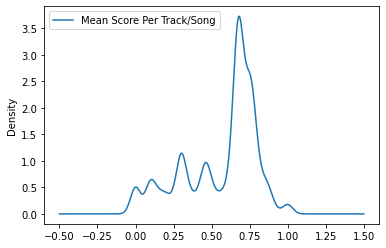

In [17]:
df_utility.mean(axis=0).plot.density(
    legend=True, label='Mean Score Per Track/Song')

Based on the results, we can that it almost copies the first density plot which solidifies our claim that the dataset is more of biased on the positive sentiment score/positive feelings.

Now that we have already show some statistical measures and data analysis, we can already proceed with the colloborative filtering programs.

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">Collaborative Filtering</span></div>

The Collaborative filtering process will be broken to 4 Different Models, each showcasing different characteristics which will be described on the following parts. The 4 parts are as follows:

    1. User Based Collaborative Filtering using Base Algorithm
    2. User Based Collaborative Filtering using Surprise Library Function
    3. Item Based Collaborative Filtering using Base Algorithm
    4. Item Based Collaborative Filtering using Surprise Library Function

In order to minimize also the scope, we will be choosing a unique user as an example in predicting the next possible songs

## User-Based Next Song Recommender - Algorithm

In order to create a recommender system that is based on the user's choice of songs, we will try to use the the user-based collaborative filtering. The algorithm for a user-based collaborative filtering are as follows:

    for every user U:
        find n most similar users
        for every unrated item I of U:
            set rating as the weighted average rating among the most similar users who rated that item

The code below will use the algorithm above to recommend next songs based on the user choice of songs which in relation to the similar users of the user_ids.

In [18]:
def user_recommend(user, df, hw, sim_user):
    """A Function that accepts a different parameters and returns the best  
    recommendations for that user by a user-based recommender 
    system.

    user(String) - Specific User String
    df(dataframe) - Specific Final Dataframe with Sentiment Scores
    hw(integer) - Number of Recommendations to Return
    sim_user(integer) - Number of Similar Users to take account"""

    # creating the Utility Matrix

    orig = df.copy().set_index('User')
    track = orig.loc[user]['Track_ID'].values
    df2 = orig[orig.Track_ID.isin(track)]
    withsim = list(set(df2.index))
    orig3 = orig.loc[withsim].pivot_table(index='User',
                                          columns='Track_ID',
                                          values='Score',
                                          fill_value=None)
    # Mean Centering

    df4 = (orig3.sub(orig3.mean(axis=1), axis=0)).dropna(axis=0, how='all')

    # Similar Users

    newdf = df4.drop(user)
    df_sim = pd.DataFrame(columns=['track', 'cosd', 'simd'])
    for x1 in newdf.index:
        newdf1 = df4.loc[[user, x1]].dropna(axis=1).to_numpy()
        cos = cosine(newdf1[0], newdf1[1])
        sim = 1-cos
        df_sim.loc[x1] = [x1, cos, sim]

    df_supersim = df_sim.sort_values(by=['cosd', 'track'])[:sim_user]
    first1 = list(df_supersim.index.values)
    first1.append(user)
    finaldf = df4.loc[first1]
    finaldf3 = finaldf.drop(user)
    simil = (df_supersim['simd'].to_numpy())

    # ratings
    ratings = pd.DataFrame(columns=['Ratings', 'Track ID'])
    for x2 in finaldf3.columns:
        if np.isnan(orig3.loc[user][x2]):
            a = (simil*finaldf3[x2]*finaldf3[x2].notnull()).sum()
            b = (np.abs(simil)*finaldf3[x2].notnull()).sum()
            c = orig3.loc[user].mean()
            d = ((a/b)+c)
            ratings.loc[x2] = [d, x2]

    results = ratings.sort_values(by=['Ratings', 'Track ID'],
                                  ascending=False)[:hw].drop('Track ID',
                                                             axis=1)

    return results

We will be passing in the user_recommend function the final dataframe from the data preprocessing stage, this final dataframe will serve the as main dataset where the songs will be recommended. In order to have a holistic view of the recommender system, we will be choosing a variable user_id which we will be used for the whole research. 

The user_id we will choose will serve a user who has chosen and listened to several songs and would like to have a recommended songs on the next play. For now, let us pass the chosen user which is **user:1410001**.

We will also be showing only the top 10 songs that is recommended for this user reflected by the "hw" variable. We will also chose only the first 10 similar users where the cosine distance between the chosen user and the other users is the closest. This is reflected on the sim_user variable.

The result of the function above are as follows:

In [19]:
Top_ten_user_function = user_recommend(1410001, user_final, 10, 10)
Top_ten_user_function

,Ratings
713e34466e7adee5fac5d856f25b60d9,0.783440
67a0c3497a087baa943748d42429d163,0.704274
a15914b2e83be19a36b65df32bf92644,0.627885
1d8a888a25d9fd9dd74ad8b5f3d808fe,0.627885
d5aef58f7e6e7cf36b7af3d4bad557d4,0.537520
47ef11452c85e9a37a13ba5af5a27bcc,0.517572
2194695885ccab41b5afa766a9302652,0.508614
682ca91627fafb2a140f3aa93631d821,0.467572
9b7f248560ec731a4ffecc526e1f5528,0.466478
f6f8ce0a02aac7888c3138ec00a5cdb5,0.465619


We can see from the results above that the needed recommended songs for the user: 1410001 have varying ratings of sentiment scores.

There is also a possibility of using the Surpise Library Function to simulate a user based collaborative filtering. We will be using the same user and compare and contrast the resulting recommended songs to have a good conclusion.

## User-Based Next Song Recommender- Surprise

The Surprise function is an python sci-kit used for building, analyzing and modeling recommender system which can be used for dataset having explicit rating data. Since we used our sentiment scores as the explicit ratings, then is it also possible that surprise function can be used for the modeling of the recommender system.

The code below will use the knnmeans function of surprise which mimics the mean centering properties of our algorithm above.

In [20]:
from surprise import (Reader, Dataset, KNNWithMeans)
user_final_sur = user_final.set_index('User', drop=False)
reader = Reader(rating_scale=(0, 1))
dataset_user = Dataset.load_from_df(user_final_sur, reader)
sim_options = {'name': 'cosine', 'user_based': True,
               'min_support': 1, 'shrinkage': 0}
knn = KNNWithMeans(k=10, sim_options=sim_options)
knn.fit(dataset_user.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


Showing the **Top Ten Recommended Results using the Surprise function**

In [21]:
list1 = []
user_preferred = 1410001

for x in user_final.Track_ID.unique():
    res = knn.predict(user_preferred, x)[3]
    list1.append((x, res))
Top_ten_user_suprise = pd.DataFrame(columns=['Ratings'])

for x in sorted(list1, key=lambda x: (x[1]), reverse=True)[:10]:
    Top_ten_user_suprise.loc[x[0]] = x[1]
Top_ten_user_suprise

,Ratings
27d4461343169df62c708c04195e1c16,1
4ba0e0519c924e5c2713ca16163e2319,0.847517
ae6d8a8f10e7195e1e6eb1597dcb08f9,0.805851
5cd1c4f96b9ee8e498adec04ad24c13a,0.737412
c91b66264b8c1250c4ea6f9a818029aa,0.734912
0326791699bd5c39b49a5695a1221618,0.724601
394f5fd51d4bb27603dfc17b4485c1e4,0.724601
2c7d6ffa58e9bc2050dcd3a8f4a94220,0.687412
18939d2d70af5b04dc6f09efdd1f4856,0.687412
347adc97e1197c72ad50b325b3aecbb1,0.687412


Since we can see that the results are quite different with the algorithm based, let us also get the predicted ratings from the results of the algorithm based

In [22]:
Top_ten_user_funcsurp = Top_ten_user_function.copy()
Top_ten_user_funcsurp['Surprise'] = Top_ten_user_function.Ratings

In [23]:
for x in Top_ten_user_function.index:
    res = knn.predict(user_preferred, x)[3]
    Top_ten_user_funcsurp['Surprise'].loc[x] = res
Top_ten_user_funcsurp

,Ratings,Surprise
713e34466e7adee5fac5d856f25b60d9,0.783440,0.465385
67a0c3497a087baa943748d42429d163,0.704274,0.465385
a15914b2e83be19a36b65df32bf92644,0.627885,0.550825
1d8a888a25d9fd9dd74ad8b5f3d808fe,0.627885,0.627885
d5aef58f7e6e7cf36b7af3d4bad557d4,0.537520,0.537520
47ef11452c85e9a37a13ba5af5a27bcc,0.517572,0.525931
2194695885ccab41b5afa766a9302652,0.508614,0.508614
682ca91627fafb2a140f3aa93631d821,0.467572,0.491820
9b7f248560ec731a4ffecc526e1f5528,0.466478,0.464313
f6f8ce0a02aac7888c3138ec00a5cdb5,0.465619,0.465619


Since there is a possibility of different song recommended for the Algorithm Based and Surprise Based Algorithm, we will be discussing the most suitable recommender system in the results section. We will now proceed to the Item based part.

## Item-Based Next Song Recommender - Algorithm

In order to create a recommender system that is based on the user's choice of songs, we will try to use the the item-based collaborative filtering. The algorithm for a item-based collaborative filtering are as follows:

    for every item I:
        find n most similar items
        for every user U that did not rate I:
            set rating as the weighted average rating among the most similar items rated by U

The code below will use the algorithm above to recommend next songs based on the user choice of songs which in relation to the similar users of the track_id.

In [24]:
def item_recommend(user, df, hw, sim_user, tracklist):
    """A Function that accepts a different parameters and returns the best  
    recommendations for that user by a user-based recommender 
    system.

    user(String) - Specific User String
    df(dataframe) - Specific Final Dataframe with Sentiment Scores
    hw(integer) - Number of Recommendations to Return
    sim_user(integer) - Number of Similar Users to take account
    tracklist(list) - List of Chosen Track ids"""

    # creating the utility matrix
    orig = df.copy().set_index('User')
    orig2 = orig.pivot_table(
        index='User', columns='Track_ID', values='Score', fill_value=None)
    orig3 = orig2.copy()

    # mean centering
    df_mean = (orig3.sub(orig3.mean(axis=1), axis=0)).dropna(axis=0, how='all')
    results = []

    # getting the similar uses and ratings
    nanlist = tracklist
    with tqdm(total=len(nanlist)*df_mean.shape[1]) as pbar:
        for x1 in nanlist:
            newdf = df_mean.drop(x1, axis=1)
            list1 = []
            for x2 in newdf.columns:
                newdf1 = df_mean[[x1, x2]].dropna(axis=0)
                CD = cosine(newdf1[x1].values, newdf1[x2].values)
                if CD != np.nan:
                    list1.append([x2, CD, 1-CD])

                pbar.update(1)

            simil_user = pd.DataFrame(list1, columns=['items', 'cosd', 'simd'])
            sortsim = simil_user.dropna().sort_values(
                by=['cosd', 'items'])[:sim_user]
            index_similar = sortsim['items'].values
            simil = (sortsim['simd'].values)
            a = (df_mean[index_similar].loc[user].values*simil *
                 df_mean[index_similar].loc[user].notnull()).sum()
            b = (np.abs(simil) *
                 df_mean[index_similar].loc[user].notnull()).sum()
            c = orig3.loc[user].mean()
            try:
                results.append((x1, (a/b)+c))
            except:
                pass
        res1 = pd.DataFrame(results, columns=['items', 'ratings']).dropna()
        res2 = res1.sort_values(by=['ratings', 'items'],
                                ascending=[False, True])[:hw]
    return res2

**Note!**:

It is well known in the data science community that if the number of track_id are very large, then the item based would have a long running time. For our dataset, which has around 22,000 Track IDS on the utility matrix, it will actually parse through each of this track, take several hours to perform (22,000 times 22,000). In order to minimize the scope, we will be only checking the ratings of the track ids of the top ten in the user based recommender algorithm.

The result are as follows:

In [25]:
Top_ten_item_function = item_recommend(
    1410001, user_final, 10, 10, Top_ten_user_function.index)

100%|█████████▉| 220910/220920 [08:06<00:00, 454.05it/s]


In [26]:
Top_ten_item_function

,items,ratings
6,2194695885ccab41b5afa766a9302652,0.630769
1,67a0c3497a087baa943748d42429d163,0.630769
0,713e34466e7adee5fac5d856f25b60d9,0.630769
4,d5aef58f7e6e7cf36b7af3d4bad557d4,0.630769
3,1d8a888a25d9fd9dd74ad8b5f3d808fe,0.568750


## Item-Based Next Song Recommender- Surprise

We will also be checking the results of the ratings when using the item based function on the surprise library.

In [27]:
from surprise import (Reader, Dataset, KNNWithMeans)
user_final_sur = user_final.set_index('User', drop=False)
reader = Reader(rating_scale=(0, 1))
dataset_user = Dataset.load_from_df(user_final_sur, reader)
sim_options = {'name': 'cosine', 'user_based': False,
               'min_support': 1, 'shrinkage': 0, 'squeeze': 0}
knn = KNNWithMeans(k=10, sim_options=sim_options)
knn.fit(dataset_user.build_full_trainset())

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [28]:
list4 = []
user_preferred = 1410001

for x in user_final.Track_ID.unique():
    res = knn.predict(user_preferred, x)[3]
    list4.append((x, res))
Top_ten_item_suprise = pd.DataFrame(columns=['Ratings'])

for x in sorted(list4, key=lambda x: (x[1]), reverse=True)[:10]:
    Top_ten_item_suprise.loc[x[0]] = x[1]
Top_ten_item_suprise

,Ratings
c49d2670c7327779a2abc0f148468ac7,1
42010e5165700c22389df1fad5faf234,1
8c247a70e53fd1e76b021f0fca4b0d01,1
cbada6c94eaa54330a955bc760b06034,1
dc8a89ed63b90bb3c0506fd23cbd8286,1
52353ad9977096c4504e54148b660523,1
5452230512e9ecaf5a1f6ef94b34264f,1
db97f6bc4862b2eec74ef32408c3b003,1
e25deb27a8c09a6071d4ba92ce5a99ab,1
f9295b1a57078dee740e34b90b3d680e,1


Let also get the predicted rating using the results of the user based model.

In [29]:
Top_ten_items_funcsurp = Top_ten_user_function.copy()
Top_ten_items_funcsurp['ItemB - Surprise'] = Top_ten_user_function.Ratings
for x in Top_ten_user_function.index:
    res = knn.predict(user_preferred, x)[3]
    Top_ten_items_funcsurp['ItemB - Surprise'].loc[x] = res
Top_ten_items_funcsurp

,Ratings,ItemB - Surprise
713e34466e7adee5fac5d856f25b60d9,0.783440,0.875000
67a0c3497a087baa943748d42429d163,0.704274,0.795833
a15914b2e83be19a36b65df32bf92644,0.627885,0.659910
1d8a888a25d9fd9dd74ad8b5f3d808fe,0.627885,0.784375
d5aef58f7e6e7cf36b7af3d4bad557d4,0.537520,0.450000
47ef11452c85e9a37a13ba5af5a27bcc,0.517572,0.607643
2194695885ccab41b5afa766a9302652,0.508614,0.421094
682ca91627fafb2a140f3aa93631d821,0.467572,0.521399
9b7f248560ec731a4ffecc526e1f5528,0.466478,0.499925
f6f8ce0a02aac7888c3138ec00a5cdb5,0.465619,0.453241


Now that we have created our models, we can now discuss the results. We will be also checking the pattern mining of the choosing of the track_ids.

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">Frequent Item Set Mining</span></div>

In this part, we will be showing the frequent item set that can be derived from the database of users and tracks. In pattern mining, it is important to check which parameters needs to be set as the transactions and the items. For this dataset, we will be using the User as the transaction and the track_ids as the items. This is done in order to check which unique track_ids often comes with other track_ids. In this way, the pattern mining might be also helpful in determining the next song

Let us first create a main database for the FIM part, we should create a transaction list detailing all the items per transaction. The code are as follows:

In [30]:
import fim
user_fim = user_final.groupby('User')['Track_ID'].apply(set).values.tolist()
user_fim[:3]

[{'5650d316220c726016a1bc9387c3b18a',
  'af5383ec56b92bc6e2fef460747cb50d',
  'b3f19f29399b6e71bb5cbafdf890d01a',
  'c49d2670c7327779a2abc0f148468ac7'},
 {'06e99b67c0df1371643b5cb11eae1a13'},
 {'014e9f12626f78649aaa7226ab62fd1f',
  '044fc8e3773032edf71fb1fcb75b8aad',
  '0bda79b2dda59822c1f9599a76802644',
  '0d6a91a19299200b224942263489bdcc',
  '1c9907719cd71f815eb4f667da1ee67b',
  '2e8d9093acab32fdb62374579e125c21',
  '2f16898cc234470620da38e1fd912be6',
  '40f6d454ce59d50fa7deffdc594aca3e',
  '4ec07b731bb57fc74ddfaa15bc3f1a1c',
  '80fc01725cbc96da7550daed6dd5ec34',
  '8c1e4ed70911e677e05552323df0e73a',
  'ba14300fb33edbcf93283f1230e917f4'}]

For the FIM, we will be using the pyFIM library to be able to get the needed patterns.

## 10 Most Frequent Maximal Itemsets

In [31]:
Results1 = fim.apriori(user_fim, supp=1, zmin=1)
itemset = sorted(Results1, key=lambda x: (-x[1], -len(x[0]), x[0]))
itemset1 = [i for i in itemset if np.sum([set(i[0]).issubset(set(j[0]))
                                          for j in itemset]) == 1]
itemset1

[(('3d02f9fcad37e6bb227682761039498c',), 44),
 (('d6b1124fdd64c4b1afa59f967397111d',), 43),
 (('9c5ddffd7e5f467e6500dcd4ed6a68da',), 42)]

## 10 Association Rules with Highest Lift

In [39]:
results2 = fim.arules(user_fim, supp=1, conf=5, zmin=1, report='acl')
itemset2 = []
for x in sorted(results2, key=lambda x: (-x[4])):
    itemset2.append((tuple(sorted(x[1])), x[0], x[2], x[3], x[4]))
itemset2[:3]

[(('d6b1124fdd64c4b1afa59f967397111d',),
  'a199862c23e1f1a2255e2a16acf22614',
  3,
  0.06976744186046512,
  92.6046511627907),
 (('d6b1124fdd64c4b1afa59f967397111d',),
  'e84d723d2fc6206c865290c0e5ac4393',
  3,
  0.06976744186046512,
  92.6046511627907),
 (('d6b1124fdd64c4b1afa59f967397111d',),
  '929293d5e511d46eee3a1c979cffe32a',
  3,
  0.06976744186046512,
  92.6046511627907)]

## Possible Itemset with zmin=2

In [40]:
results4 = fim.apriori(user_fim, supp=1, zmin=2)
itemset4 = sorted(results4, key=lambda x: (-x[1], -len(x[0]), x[0]))
itemset4[:10]

[]

It seems that the dataset does not have recurring track_ids with other track_ids.

Now that we have created our recommender models and the needed pattern mining,we can now discuss the results.

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">RESULTS AND DISCUSSION</span></div>

Based on the results seen on the recommender modeling and itemset mining, we can derive different explanations by comparing each results.

First off, Let us check if the results of the User Based Model coincides with the mean sentiment score of the chosen user. This is done by comparing the predicted sentiment scores of recommended tracks/songs to the mean sentiment score of the all tracks the user listened to which he/she has inputted specific hashtags also to show his sentiment to that specific track.

For the **User: 1410001** his mean sentiment score is:

In [41]:
print('Mean Sentiment Score of User:1410001 is ',
      user_final.query('User == 1410001')['Score'].mean())

Mean Sentiment Score of User:1410001 is  0.46538461538461573


### Results for User Based:

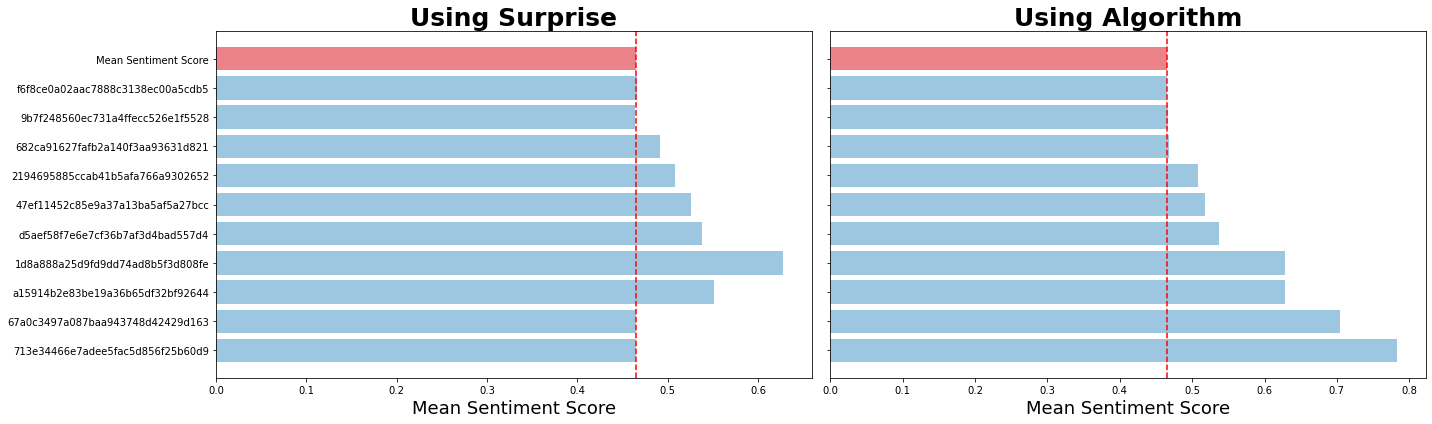

In [42]:
compare_user = Top_ten_user_funcsurp.copy()
compare_user.columns = ['Algorithm', 'Surprise']
mean1 = user_final.query('User == 1410001')['Score'].mean()
compare_user.loc['Mean Sentiment Score'] = [mean1, mean1]
pal = ['#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0',
       '#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0', '#ec838a']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

axes[0].barh(compare_user.index, compare_user.Surprise, color=pal)
axes[0].set_title("Using Surprise", fontsize=25, fontweight='bold')
axes[0].set_xlabel('Mean Sentiment Score', fontsize=18)
axes[0].axvline(mean1, color='red', linestyle='--')
axes[1].barh(compare_user.index, compare_user.Algorithm, color=pal)
axes[1].set_title("Using Algorithm", fontsize=25, fontweight='bold')
axes[1].axvline(mean1, color='red', linestyle='--')
axes[1].set_xlabel('Mean Sentiment Score', fontsize=18)
plt.tight_layout()
plt.show()

From the graph above, we can see the comparison of the mean sentiment score to the results of the user based recommender system in both the surprise function and the algorithm model. We can now derive specific analysis on the results as follows:

1. The Results of the User Based Model using the Algorithm way when compared to the mean sentiment score of the user is considered to give a different sentiment score. We can see that the mean sentiment score is only around 0.47 which means that we are expecting the the recommended songs should be in the range of this mean sentiment score. Checking the Graph, the results suggested songs that are way above the mean sentiment score. Making this model not ideal for this user and dataset.


2. The Results of the User Based Model using the Surprise function when compared to the mean sentiment score of the user is much more ideal compared to the algorithm part. We can see that more recommended songs are in the range of the mean sentiment score. This makes the user based surprise model much more applicable and ideal between the two.

### Results for Item Based:

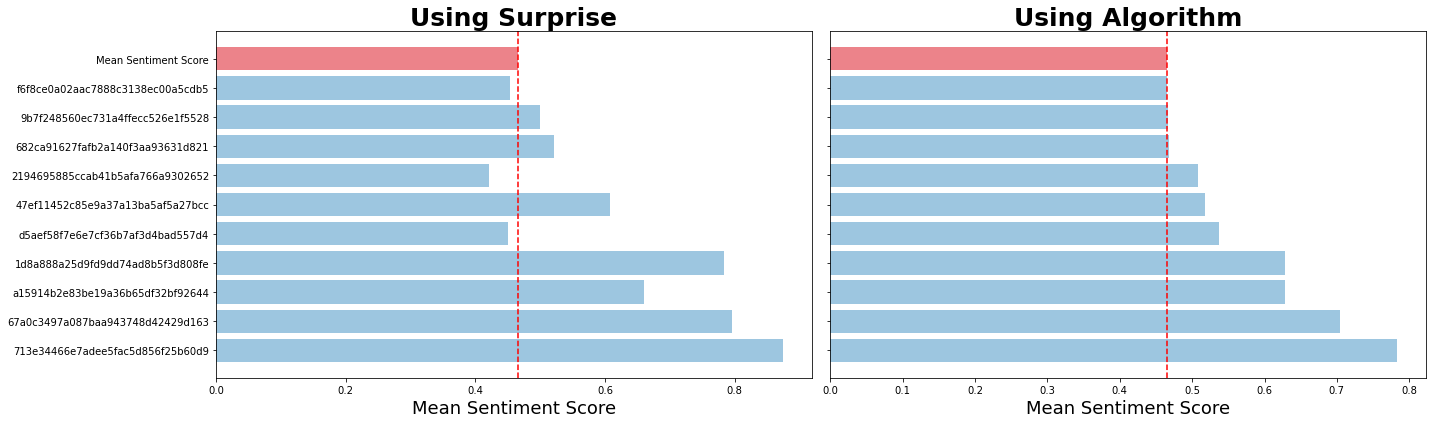

In [43]:
compare_item = Top_ten_items_funcsurp.copy()
compare_item.columns = ['Algorithm', 'Surprise']
mean1 = user_final.query('User == 1410001')['Score'].mean()
compare_item.loc['Mean Sentiment Score'] = [mean1, mean1]
pal = ['#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0',
       '#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0', '#9dc6e0', '#ec838a']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6), sharey=True)

axes[0].barh(compare_item.index, compare_item.Surprise, color=pal)
axes[0].set_title("Using Surprise", fontsize=25, fontweight='bold')
axes[0].set_xlabel('Mean Sentiment Score', fontsize=18)
axes[0].axvline(mean1, color='red', linestyle='--')
axes[1].barh(compare_item.index, compare_item.Algorithm, color=pal)
axes[1].set_title("Using Algorithm", fontsize=25, fontweight='bold')
axes[1].axvline(mean1, color='red', linestyle='--')
axes[1].set_xlabel('Mean Sentiment Score', fontsize=18)
plt.tight_layout()
plt.show()

From the graph above, we can see the comparison of the mean sentiment score to the results of the item based recommender system in both the surprise function and the algorithm model. We can now derive specific analysis on the results as follows:

1. The Results of the Item Based Model using the Algorithm way when compared to the mean sentiment score of the user is considered to give a different sentiment score which is the same as the user based counterpart. We can see that the mean sentiment score is only around 0.47 which means that we are expecting the the recommended songs should be in the range of this mean sentiment score. Checking the Graph, the results suggested songs that are way above the mean sentiment score. Making this model not ideal for this user and dataset. It is also noteworthy to compare the results of the graph are almost the same with the surprise counterpart which is a very interesting to check.


2. The Results of the Item Based Model using the Surprise function when compared to the mean sentiment score of the user is much more ideal compared to the algorithm part. We can see that more recommended songs are in the range of the mean sentiment score. This makes the user based surprise model much more applicable and ideal between the two. There is a bit similarity between the graph of the item based to user based counterpart which is an interesting find.

### Results for Frequent Itemset Mining:

It is note worthy if it is possible that we can find a connection between the results of the user based and item based recommender system to the results of the frequent itemset mining. We can compare the results of the maximal frequent itemsets track_ids and the association rules results to the track_ids given by the recommender system model.

Comparing the results of the recommender models and association rules:

In [44]:
for x in itemset2:
    if x[1] in Top_ten_items_funcsurp.index:
        print(x)

(('3d02f9fcad37e6bb227682761039498c',), '9b7f248560ec731a4ffecc526e1f5528', 5, 0.11363636363636363, 37.708333333333336)
(('d6b1124fdd64c4b1afa59f967397111d',), '9b7f248560ec731a4ffecc526e1f5528', 4, 0.09302325581395349, 30.868217054263567)
(('d6b1124fdd64c4b1afa59f967397111d',), '682ca91627fafb2a140f3aa93631d821', 3, 0.06976744186046512, 25.25581395348837)


Discussion of the results are as follows:

1. Based on the cell above, it seems that there is a connection between the top recommended songs and the results of the association rules. There are 3 Pairs of associations rules that is also in the recommended songs. Using this results, it seems that their is also possibility that when the recommended songs having an association rule is recommended, its more likely than their pair would be recommended also. Considering that they have lifts that is around 90.


2. It is noteworthy also that there no recommended songs that is considered a maximal frequent itemset.

With this Results we can already conclude some items regarding this research.

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white; font-size: 20px; font-weight: bold">CONCLUSION AND RECOMMENDATION</span></div>

<p style="text-align: justify"> A Trainset from the nowplaying-rs dataset was parsed through by undergoing data analysis, data preprocessing and further filtering. To create the best next song recommender system using the sentiment score of the dataset, collaborative filtering was chosen. There are various models that can be chosen but for this research, the user-based, and item-based modeling will be used in partner with its surprise and algorithm counterparts. The results show the following conclusions:
    
    
1.	The User-Based Modeling using the Surprise function is more ideal compared to the algorithm function for this dataset since its recommended songs are the closest to the mean sentiment score of the chosen user.

    
2.	The Item-Based Modeling using the Surprise function is more ideal compared to the algorithm function for this dataset since its recommended songs are the closest to the mean sentiment score of the chosen user.

    
3.	Choosing between the Item Based and User Based will be up to the evaluator since both ideal models have their strengths and weaknesses. For the specific user and this research, it seems that the best model out of the four models, is the User-Based Model using the Surprise Function.

    
4.	There is a possibility that the recommended songs for the User-Based Collaborative Filtering will have association rules that can be also used for further recommending.

    
5.	Using the Sentiment Score as the explicit rating for the track_id, the research was able to create a next song recommender system. The recommender system was able to use the explicit values of the sentiments score and predict appropriate songs that matches the mean sentiment score of the user. Using this approach, the sentiment feeling of the user will be seamless throughout.

    
    
Additional Recommendation are given also to further improve the research. Since the item-based modeling is minimized due to long runtime. It would prove to be much more important to create a much-optimized code for implementing the item-based Model. Parsing all the track_id in the item based would surely improve the research. It is also recommended to check all the nowplaying-RS dataset, not only the train set, to test the model. Since there is also a test set, it is great to check the results of the test set and compare it to the results of this research. It is recommended also to use the Dask Library to parse the whole nowplaying-RS Dataset to get a whole complete picture of how the sentiment score would prove to be of use in recommending the next song.
 </p>

<div><span style="background-color: #488f31; padding-top: 100px; padding-right: 20px; padding-bottom: 50px; padding-left: 20px; color: white ; font-size: 20px; font-weight: bold">REFERENCES AND ACKNOWLEDGEMENTS</span></div>

[1] https://www.ibisworld.com/industry-statistics/market-size/music-publishing-united-states/

[2] http://mac.citi.sinica.edu.tw/~yang/pub/poddar18smc.pdf

[3] https://www.kaggle.com/chelseapower/nowplayingrs